In [1]:
# generic imports #
#-----------------#
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
### Exercice 1 ###

#1. Différence entre les deux codes 
#sur papier
#grid_search.fit(X, y)
#acc = grid_search.best_score_

#cv_res = cross_val_score(grid_search, X, y, cv = 10)
#acc = cv_res.mean()

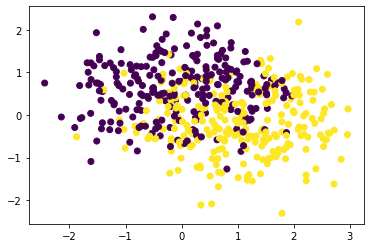

In [2]:
#2. Procédure SVM basé noyau RBF

# general imports
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

#importation des données
from sklearn.datasets import make_moons
X, y = make_moons(500, noise = 0.6, random_state = 27)


#affichage du plot
# plot
fig = plt.figure()
plt.scatter(X[:,0], X[:,1], c = y)
plt.show()


C:\Users\im2ag\Downloads\WPy64-3741\python-3.7.4.amd64\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


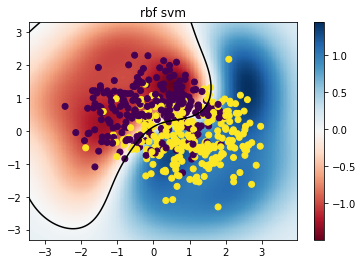

In [5]:
#mdoèle décision
def show_model_decision(X, y, model) : 
    # define (x,y) grid
    x0_min = np.min(X[:,0])
    x0_max = np.max(X[:,0])
    x1_min = np.min(X[:,1])
    x1_max = np.max(X[:,1])
    xx, yy = np.meshgrid(np.linspace(x0_min-1, x0_max+1, 200), np.linspace(x1_min-1, x1_max+1, 200))
    # evaluate decision function in a grid
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()]) # the ravel() function converts a 2D array in 1D
    Z = Z.reshape(xx.shape)
    # plot model score
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.RdBu)
    plt.colorbar()
    # plot classification boundary
    plt.contour(xx, yy, Z, 0, colors = 'k')
    # show data points
    plt.scatter(X[:,0], X[:,1], c = y)

from sklearn.svm import SVC

# rbf model
svm_rbf = SVC(kernel = 'rbf')
svm_rbf.fit(X, y)
show_model_decision(X,y,svm_rbf)
plt.title('rbf svm')

# show figure
plt.show()


In [6]:
#mise en valeur des codes pour montrer la différence

#code 1

from sklearn.model_selection import GridSearchCV

# instantiate model

svm_rbf = SVC(kernel = 'rbf')

# define grid of parameter

C_grid = np.logspace(-3,3, 10)
gamma_grid = [0.1, 0.25, 0.5, 0.75, 1, 2]
param_grid = {'C' : C_grid,
             'gamma' : gamma_grid}

# optimise parameter

grid_search_rbf = GridSearchCV(svm_rbf, param_grid, cv= 10)
grid_search_rbf.fit(X,y)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03]),
                         'gamma': [0.1, 0.25, 0.5, 0.75, 1, 2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

The best parameters are {'C': 0.1, 'gamma': 0.75} with an accuracy of 0.80


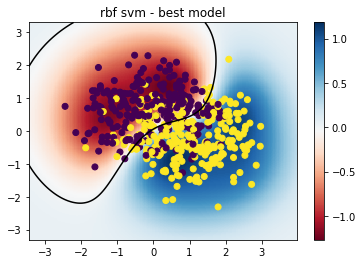

In [8]:
# show results

print("The best parameters are %s with an accuracy of %0.2f"
     % (grid_search_rbf.best_params_, grid_search_rbf.best_score_))

# show decision boundary

show_model_decision(X, y, grid_search_rbf.best_estimator_)
plt.title('rbf svm - best model')

# show figure
plt.show()

In [7]:
#resultat final du code 1 on aurait qu'une seule valeure
accuracy1 = grid_search_rbf.best_score_


In [8]:
#code2

from sklearn.model_selection import cross_val_score

cv_res = cross_val_score(grid_search_rbf, X, y, cv = 10) #logiquement un peu plus de temps à tourner
accuracy2 = cv_res.mean()

print("The best parameters are %s with an accuracy of %0.2f"
     % (cv_res, accuracy2))

C:\Users\im2ag\Downloads\WPy64-3741\python-3.7.4.amd64\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\im2ag\Downloads\WPy64-3741\python-3.7.4.amd64\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\im2ag\Downloads\WPy64-3741\python-3.7.4.amd64\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\U

The best parameters are [0.82 0.78 0.8  0.78 0.72 0.82 0.78 0.88 0.74 0.78] with an accuracy of 0.79


C:\Users\im2ag\Downloads\WPy64-3741\python-3.7.4.amd64\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [ ]:
#les deux resultats sont très proche la différence est légère
#le code 2 semble tout de meme plus robuste et de meilleur qualité


In [9]:
### Exercice 2 ###
import pandas as pd

#importation des jeu de données
X_test = pd.read_table("C:/Users/im2ag/Desktop/M2 SSD/COURS ET TP FOUILLE DE DONNES/EXAMEN/dataset-exo2/test-data.txt", sep=' ')
train = pd.read_table("C:/Users/im2ag/Desktop/M2 SSD/COURS ET TP FOUILLE DE DONNES/EXAMEN/dataset-exo2/train-data.txt", sep=' ')
print(train)

     Gram  feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0     NEG   0.058753   0.057243   0.050666   0.054601   0.051106   0.054563   
1     NEG   0.047111   0.052490   0.051228   0.052810   0.053670   0.049795   
2     NEG   0.048959   0.058325   0.042828   0.053562   0.052253   0.051208   
3     NEG   0.056847   0.054794   0.049040   0.057075   0.047005   0.052528   
4     NEG   0.053074   0.045115   0.044600   0.050904   0.048808   0.051350   
...   ...        ...        ...        ...        ...        ...        ...   
2398  POS   0.040862   0.044109   0.046752   0.043077   0.049439   0.044183   
2399  POS   0.063200   0.069162   0.064695   0.067147   0.069054   0.062134   
2400  POS   0.060648   0.058785   0.060071   0.061500   0.059259   0.061260   
2401  POS   0.059543   0.051692   0.054257   0.060780   0.055261   0.060040   
2402  POS   0.073759   0.073683   0.071870   0.070860   0.075634   0.069500   

      feature_7  feature_8  feature_9  ...  feature

In [10]:
#1. Elements d'analyse exploratoire
#prise de connaisances des données

#jeu de données train
train.shape
#Nous avons 2403 lignes et 241 colonnes pour le train

# show dataset constitution
# extract X and y
X_train = train.iloc[:,1:]
Y_train = train.iloc[:,0]

#remplacement des valeurs
Y_train[Y_train == "NEG"] =  0
Y_train[Y_train == "POS"] =  1
#

C:\Users\im2ag\Downloads\WPy64-3741\python-3.7.4.amd64\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\im2ag\Downloads\WPy64-3741\python-3.7.4.amd64\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


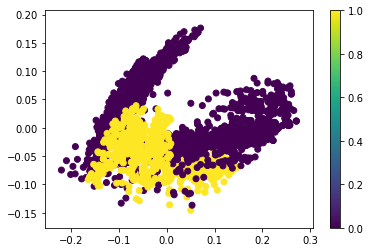

In [11]:
#representation de l'ACP
# fit PCA (with 2 PCs)
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(X_train)
Xpca = pca.transform(X_train) 
#représentation des deux premiers axes
plt.scatter(Xpca[:,0],Xpca[:,1], c = Y_train)
plt.colorbar()
plt.show()

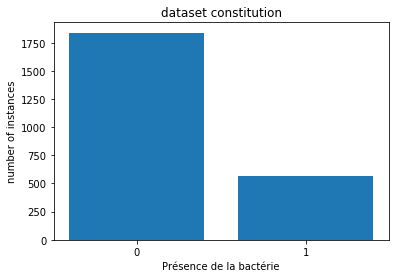

In [12]:
#representation proportion NEG/POS
# show dataset constitution
class_ids = np.unique(Y_train)
K = len(class_ids)
counts = np.bincount(Y_train)
plt.bar(range(K), counts)
plt.ylabel('number of instances')
plt.title('dataset constitution')
plt.xlabel('Présence de la bactérie')
plt.xticks(range(K), np.unique(train.iloc[:,0]))
#axes.xaxis.set_ticklabels(['NEG', 'POS'], rotation = 90, color = 'red', fontsize = 8, style = 'italic', verticalalignment = 'center')
plt.show()


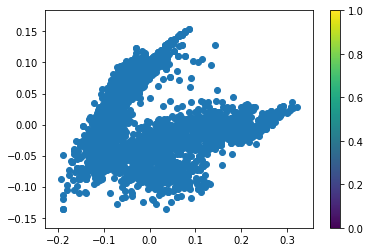

In [13]:
#jeu de données test
X_test.shape
#Nous avons 3130 lignes et 240 colonnes pour le test
#acp des données pour voir si problème 
# fit PCA (with 2 PCs)
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(X_test)
Xpca_test = pca.transform(X_test) 
#représentation des deux premiers axes
plt.scatter(Xpca_test[:,0],Xpca_test[:,1])
plt.colorbar()
plt.show()

In [14]:
#2. Construire un modèle de prédiction visant à maximiser l’aire sous la courbe 

X_test = pd.read_table("C:/Users/im2ag/Desktop/M2 SSD/COURS ET TP FOUILLE DE DONNES/EXAMEN/dataset-exo2/test-data.txt", sep=' ')
train = pd.read_table("C:/Users/im2ag/Desktop/M2 SSD/COURS ET TP FOUILLE DE DONNES/EXAMEN/dataset-exo2/train-data.txt", sep=' ')

# extract X and y
X_train = train.iloc[:,1:]
y_train = train.iloc[:,0]

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(X_train, y_train, test_size = 0.25, random_state = 42)

# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

# Instantiate model with 500 decision trees
rfc = RandomForestClassifier(n_estimators = 500, random_state = 42)

# Train the model on training data
rfc.fit(train_features, train_labels)

##4
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
# Use the forest's predict method on the test data
rfc_predict = rfc.predict(X_test)
pred_proba = rfc.predict_proba(test_features)


In [ ]:
#3 Validation croisée

# define grid of parameters
param_grid = {'max_depth' : np.arange(1,11)}

# define GridSearchCV model
from sklearn.model_selection import GridSearchCV
grid_search_rfc = GridSearchCV(rfc, param_grid, cv = 10)

# carry out optimization
grid_search_rfc.fit(X_train,y_train)

# pring results
print("The best parameters are %s with a score of %0.2f"
      % (grid_search_rfc.best_params_, grid_search_rfc.best_score_))

pred = grid_search_rfc.best_estimator_.predict(X_test)

# show impact of parameters
plt.plot(grid_search_rfc.cv_results_['param_max_depth'].data, grid_search_rfc.cv_results_['mean_test_score'], '-o')
plt.xlabel('maximum tree depth')
plt.ylabel('cross-validation score')
plt.title('max_depth optimization : detailed cross-validation score')
plt.show()

In [15]:
# get cross-validation predictions & show confusion matrix #

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

rfc_cv_score = cross_val_score(rfc, X_train, y_train, cv=10, scoring=’roc_auc’)

print("=== Confusion Matrix ===")
print(confusion_matrix(test_labels, rfc_predict))
print('\n')

print("=== Classification Report ===")
print(classification_report(test_labels, rfc_predict))
print('\n')

print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')

print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

SyntaxError: invalid character in identifier (<ipython-input-15-beebedf739b2>, line 6)

In [16]:
#Autre cas
x_test = pd.read_table("C:/Users/im2ag/Desktop/M2 SSD/COURS ET TP FOUILLE DE DONNES/EXAMEN/dataset-exo2/test-data.txt", sep=' ')
train = pd.read_table("C:/Users/im2ag/Desktop/M2 SSD/COURS ET TP FOUILLE DE DONNES/EXAMEN/dataset-exo2/train-data.txt", sep=' ')

# extract X and y from train data
X_train = train.iloc[:,1:]
y_train = train.iloc[:,0]

# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 500 decision trees
rf = RandomForestClassifier(n_estimators = 500, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
# Use the forest's predict method on the test data
predictions = rf.predict(x_test)
pred_proba = rf.predict_proba(x_test)



In [ ]:
# compare roc curves #
#--------------------#
# compute scores
scores = cross_val_predict(grid_search.best_estimator_, X_train, train_labels, cv = 10, method = 'decision_function')
scores_w = cross_val_predict(grid_search_w.best_estimator_, X_train, train_labels, cv = 10, method = 'decision_function')
# build roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, scores)
fpr_w, tpr_w, thresholds = roc_curve(ytrain, scores_w)
# plot
plt.plot(fpr, tpr, label = 'standard SVM')
plt.plot(fpr_w, tpr_w, label = 'weighted SVM')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curves')
plt.legend()
plt.show()
# compute corresponding AUCs
from sklearn.metrics import roc_auc_score
auc_std = roc_auc_score(ytrain, scores)
auc_weight = roc_auc_score(ytrain, scores_w)
print('auc of standard model = %f ; auc of weighted model = %f' % (auc_std, auc_weight))